# Decision Tree 

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving HW_Data_Set.xlsx to HW_Data_Set.xlsx


In [4]:
import io
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [5]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [6]:
import pandas as pd
dms=pd.get_dummies(df[["ind_109"]])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
y=df["90_target"]
X_=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3.0,30.752568,-5.0,-22.0,-22.0,-21.0,-23.0,-36.0,-40.0,...,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3.0,36.812130,-6.0,-18.0,-24.0,-24.0,-25.0,-38.0,-43.0,...,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3.0,39.648290,-4.0,-11.0,-21.0,-22.0,-24.0,-36.0,-42.0,...,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3.0,40.902782,-5.0,-10.0,-21.0,-23.0,-26.0,-37.0,-44.0,...,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2.0,48.462194,-18.0,-26.0,-37.0,-40.0,-43.0,-53.0,-61.0,...,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 133 entries, ind_5 to ind_109_GREEN
dtypes: float64(132), uint8(1)
memory usage: 5.2 MB


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [9]:
cart_model=DecisionTreeRegressor()

In [10]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
y_pred=cart_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

21.793844927563015

In [13]:
r2_DT=r2_score(y_test,y_pred)
r2_DT

0.649656297612133

## Model Tuning

In [14]:
cart_params={"min_samples_split":[100,150,200],
            "min_samples_leaf":[100,150,200],
            "max_leaf_nodes":range(5,10),
            "max_depth":range(1,10)}

In [15]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
cart_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3968 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:  5.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': [1

In [ ]:
print("en iyi parametreler"+ str(cart_cv_model.best_params_))

en iyi parametreler{'max_depth': 8, 'max_leaf_nodes': 9, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [16]:
cart_tuned=DecisionTreeRegressor(max_depth=8, max_leaf_nodes= 9, min_samples_leaf= 100,min_samples_split= 100,random_state=42)

In [17]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [18]:

y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

32.80109419759

[Text(460.35, 498.3, 'X[54] <= 11.5\nmse = 1338.71\nsamples = 3844\nvalue = -4.451'),
 Text(404.55, 407.70000000000005, 'X[92] <= 1.239\nmse = 1275.643\nsamples = 3077\nvalue = -8.791'),
 Text(251.10000000000002, 317.1, 'X[90] <= 0.0\nmse = 1306.03\nsamples = 2539\nvalue = -5.499'),
 Text(111.60000000000001, 226.5, 'X[96] <= 1.19\nmse = 1117.511\nsamples = 1001\nvalue = -15.036'),
 Text(55.800000000000004, 135.89999999999998, 'mse = 1291.084\nsamples = 527\nvalue = -5.325'),
 Text(167.4, 135.89999999999998, 'mse = 703.109\nsamples = 474\nvalue = -25.833'),
 Text(390.6, 226.5, 'X[87] <= 1.237\nmse = 1331.014\nsamples = 1538\nvalue = 0.707'),
 Text(279.0, 135.89999999999998, 'X[42] <= 82.5\nmse = 1244.041\nsamples = 754\nvalue = -8.368'),
 Text(223.20000000000002, 45.299999999999955, 'mse = 1151.212\nsamples = 651\nvalue = -12.931'),
 Text(334.8, 45.299999999999955, 'mse = 867.81\nsamples = 103\nvalue = 20.466'),
 Text(502.20000000000005, 135.89999999999998, 'X[87] <= 1.245\nmse = 1259.2

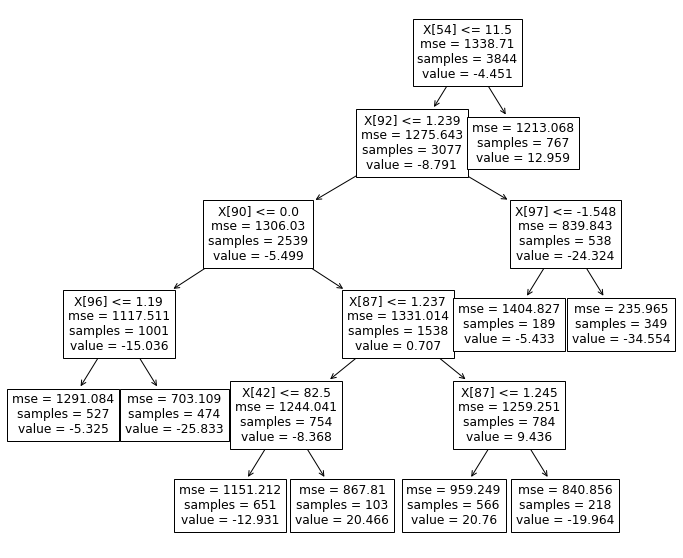

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(cart_tuned)

In [20]:
r2_DT_tuned=r2_score(y_test,y_pred)
r2_DT_tuned

0.20639706510175182

# RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf_model=RandomForestRegressor(random_state=42)

In [23]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Prediction

In [24]:
rf_model.predict(X_test)[0:5]

array([ 30.3645684 , -36.86739676, -29.59755662,  35.26185994,
        36.75555936])

In [25]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

15.241884598832966

In [26]:
r2_RF=r2_score(y_test,y_pred)
r2_RF

0.8286421751704195

## Model Tuning

In [32]:
rf_params = {"min_samples_split":(100,200),"max_depth":(5,10),
              "n_estimators": [20,50]}

In [33]:
rf_model=RandomForestRegressor(random_state=42)

In [34]:
rf_cv_model=GridSearchCV(rf_model,rf_params, cv=10,n_jobs=-1)

In [35]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [36]:
rf_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 50}

In [37]:
rf_tuned=RandomForestRegressor(max_depth=10,min_samples_split=100,n_estimators=50)

In [38]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

22.482842999178995

In [40]:
r2_RF_tuned=r2_score(y_test,y_pred)
r2_RF_tuned

0.6271543693744241

In [41]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

Text(0.5, 0, 'Değişken Önem düzeyleri')

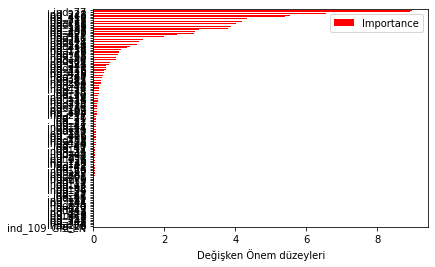

In [42]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken Önem düzeyleri")

# Neural Network

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
from sklearn.neural_network import MLPRegressor

In [48]:
mlp_model=MLPRegressor(hidden_layer_sizes=(100,20),max_iter=10000, random_state=42).fit(X_train_scaled,y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
?mlp_model

In [ ]:
mlp_model.n_layers_

4

In [ ]:
mlp_model.n_iter_

241

In [ ]:
mlp_model.hidden_layer_sizes

(100, 20)

## Prediction

In [49]:
y_pred=mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

21.91768527753872

In [51]:
r2_NN=r2_score(y_test,y_pred)
r2_NN

0.6456634311744252

## Model Tuning

In [52]:
mlp_param = {"alpha": [0.1,0.01],
             "hidden_layer_sizes": [(50,50),(100,100), (100,50,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=5, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=10000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=42, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation

In [53]:
mlp_cv_model.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}

In [54]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(50,50), activation="logistic")
mlp_tuned.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [55]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

23.95985234829101

In [56]:
r2_NN_tuned=r2_score(y_test,y_pred)
r2_NN_tuned

0.5765570785943696